# Una consideración sobre Python

Python trata de una manera especial a las listas (matrices, imágenes,...). Y no trata lo mismo a otros tipos de datos. 

Voy a poner un ejemplo para que veáis a que me refiero:

Si asignamos el valor 3 al símbolo x (x=3), luego llamamos y=x y posteriormente cambiamos y, el valor de x sigue siendo 3. Veamos este ejemplo:

In [1]:
x=3

In [2]:
y=x

In [3]:
y=y+5

In [4]:
y

8

In [5]:
x

3

Con listas (matrices o imágenes) hay que ir con un poco de cuidado. Si asignamos al símbolo m el valor de una matriz, luego llamamos n=m y cambiamos el contenido de n, por ejemplo cambiando el valor de n[0], el valor de m[0] también queda afectado por el cambio. Veamos un ejemplo:

In [21]:
m=[0,1,2]

In [22]:
n=m

In [25]:
n[0]=3

In [26]:
n

[3, 1, 2]

In [27]:
m

[3, 1, 2]

Otro ejemplo:

In [28]:
mm=[0,1,2]

In [29]:
nn=mm

In [30]:
nn[0]=nn[1]

In [31]:
nn

[1, 1, 2]

In [33]:
mm

[1, 1, 2]

Por este motivo, cuando definimos una función para codificar imágenes lo primero que hacemos es hacer una copia de la imagen y es esta copia la que transformamos (así evitamos transformar la imagen original). Es posible que para decodificar el examen tengas que hacer no una copia de la imagen sino un par de ellas.

# El examen encriptado.

- Pincha en <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/examenmatriculacod.png">este enlace</a> y descarga la imagen. Muestra la imagen aquí.


- Esta imagen es el resultado de codificar la imagen real del examen que tienes que realizar. El proceso de codificación es algo distinto al que hicimos en la primera práctica. En aquella práctica para codificar una imagen cambiábamos colores. Esto es, si img.png es la imagen que queremos codificar y M es la matriz asociada, para codificar img tomamos $M[i,j]=(R,G,B)$ y lo cambiamos $M[i,j]=(R',G',B')$. 
 
 Hoy, para codificar la imagen (correspondiente al examen) he cambiado posiciones en lugar de colores. Esto es, he cambiado $M[i,j]=M[i',j']$. Además he utilizado el método RSA para obtener $i'$ y $j'$, de manera que $i'=RSA(i,13,n)$ y $j'=RSA(j,19,m)$ con $(n,m)=img.size$.
 
 
- Descodifica la imagen que has descargado y muestrala aquí.
- Haz los ejercicios que se proponen en la imagen que has descodificado.

In [1]:
from MRG import *

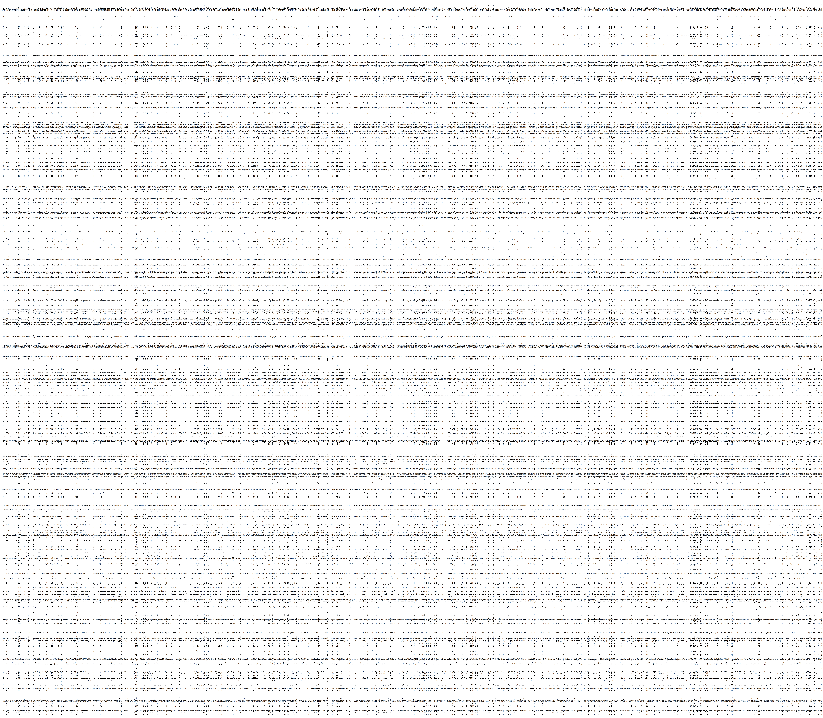

In [2]:
# Carga la imagen dada con el módulo PIL.
imag = Image.open('./examenmatriculacod.png')
# Carga la imagen en una matriz y la copia en otra
imagen = imag.copy()
imagen2 = imag.copy()
# Muestra la imagen
imagen

In [3]:
(n,m) = imagen.size
pixels = imagen.load()
pixels2 = imagen2.load()

In [4]:
print pixels[0,0]

(255, 255, 255, 255)


In [5]:
# Simplemente recolocamos los pixeles en las posiciones dadas por 
# la resolución de RSA. 
for i in xrange(n):
    for j in xrange(m):
        ip = rsa(i,n,13)
        jp = rsa(j,m,19)
        pixels2[ip,jp] = pixels[i,j]

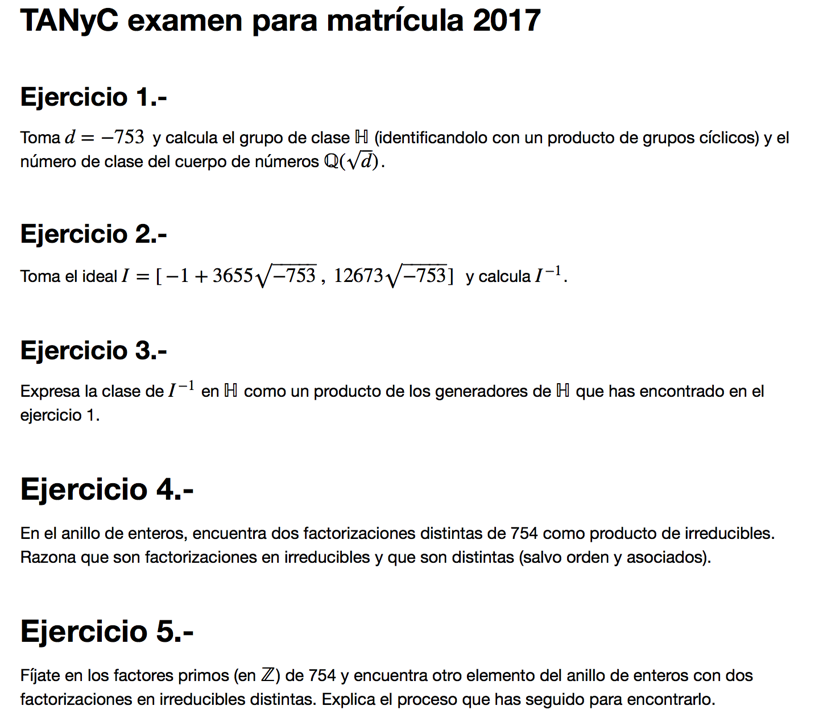

In [6]:
imagen2

# Ejercicio 1 .- Número de clase

**Enunciado:** Toma $d = -753$ y calcula el grupo de clase de $\mathbb{H}$ (identificándolo con un producto de grupos cíclicos) y el número de clase del cuerpo de números $\mathbb{Q}(\sqrt{d})$.

In [7]:
d = -753

In [8]:
# Lo que haremos será
#
#  1. calcular la cota de Minkowski y ver los primos que ramifican e ideales que generan.
#  2. buscamos inversos multiplicando y así refinamos los generadores que tenemos.
#     Esto nos dejará sólo con tres generadores.
#  3. calculamos el orden de los generadores que quedan, nos da 2,2,3.
#  4. buscamos entre todas las relaciones posibles con suma de exponentes menores
#     que la suma de máximos exponentes que podemos tomar sin sobrepasar el orden.
#     Nótese que este es un proceso finito en el que nos aseguramos que no existan
#     más relaciones que las que tenemos.
#  5. Al no encontrar ninguna relación posible, tenemos el grupo como generado
#     precisamente por los generadores que teníamos antes
#
# Los detalles de implementación están en el módulo MRG.py, aquí se desarrollan además,
# a cada paso, los resultados intermedios que se encuentran.
numeroClase(-753,profundidad=12,debug=True)

La cota de Minkowski para -753 es 34.9387695909
Los primos que ramifican por debajo de esa cota son:
[2, 3, 13, 19, 23, 29] 


Tenemos los ideales generadores
[[2, -1 + sqrt(753)*I], [3, sqrt(753)*I], [13, -1 + sqrt(753)*I], [19, -8 + sqrt(753)*I], [23, -11 + sqrt(753)*I], [29, -1 + sqrt(753)*I]]
Refinamos la lista de generadores retirando los inversos y nos quedamos con [[2, -1 + sqrt(753)*I], [3, sqrt(753)*I], [13, -1 + sqrt(753)*I]] 


El orden de los elementos nos da la siguiente matriz de relaciones
[[2 0 0]
 [0 2 0]
 [0 0 3]]
Buscando relaciones con n = 3
Buscando relaciones con n = 3
Buscando relaciones con n = 4
Buscando relaciones con n = 5
Buscando relaciones con n = 6
Buscando relaciones con n = 7
Buscando relaciones con n = 8
Buscando relaciones con n = 9
Buscando relaciones con n = 10
Buscando relaciones con n = 11
La matriz reducida es
[[2 0 0]
 [0 2 0]
 [0 0 3]]
El número de clase es  12


12

In [9]:
# Escribimos los ideales generadores del grupo de ideales fraccionarios
a = [2, -1 + sqrt(-753)]
b = [3, sqrt(-753)]
c = [13, -1 + sqrt(-753)]

# Y sabemos entonces que el grupo de clase es el dado por
#  Z_2 * Z_2 * Z_3
# ya que esos son los órdenes de los elementos que teníamos.

# Ejercicio 2 .- Ideal 

**Enunciado:** Toma el ideal $I = [-1  + 3655\sqrt{-753}, 12673\sqrt{-753}]$ y calcula $I^{-1}$.

In [10]:
# Definimos el ideal y lo factorizamos
I = [-1 + 3655*sqrt(-753), 12673*sqrt(-753)]
factoriza_id(I,-753)

{(19, -11 + sqrt(753)*I): 1,
 (23, -11 + sqrt(753)*I): 1,
 (29, -1 + sqrt(753)*I): 1}

In [11]:
# Escribe los factores del ideal, comprobamos que todos ellos
# son ideales primos.
u = [19, -11 + sqrt(-753)]
v = [23, -11 + sqrt(-753)]
w = [29, -1 + sqrt(-753)]
print normaIdeal(u,-753)
print normaIdeal(v,-753)
print normaIdeal(w,-753)

19
23
29


In [12]:
# Escribe el cociente de cada ideal primo en el que factoriza el ideal
# calcula sus inversos, y con ellos, calcula el inverso del ideal.
o = [1]
k1 = cocienteIdealPrimo(o,u,-753)
k2 = cocienteIdealPrimo(o,v,-753)
k3 = cocienteIdealPrimo(o,w,-753)
Iinverso = producto([k1,k2,k3],-753)

In [13]:
# Comprobamos que efectivamente es ideal inverso
esO(productodos(I,Iinverso,-753),-753)

True

In [39]:
Iinverso

[-1/12673 - 69030746222369*sqrt(753)*I/12673, -sqrt(753)*I]

# Ejercicio 3 .-

**Enunciado:** Expresa la clase de $I^{-1}$ en $\mathbb{H}$ como un producto de los generadores de $\mathbb{H}$ que has encontrado en el ejercicio 1.

In [36]:
print Iinverso
print normaIdeal(I,-753)

[-1/12673 - 69030746222369*sqrt(753)*I/12673, -sqrt(753)*I]
12673


In [15]:
# Dado un ideal inverso, lo multiplicamos por un ideal principal
# para tener otro ideal que sí será entero pero que además tendrá
# su misma clase de equivalencia en el grupo. El entero que tomamos
# es precisamente la norma del ideal inicial.
Jinverso = productodos([12673],Iinverso,-753)

# Comprobamos que efectivamente es inverso en el grupo.
esPrinc(productodos(I,Jinverso,-753),-753)

True

In [16]:
# Ahora lo factorizaremos. Lo que haremos será buscar una relación
# que cumpla cada uno de sus factores primos con los generadores y
# con ella crearemos la expresión del ideal como producto de generadores.
factoriza_id(Jinverso,-753)

{(19, -8 + sqrt(753)*I): 1,
 (23, -12 + sqrt(753)*I): 1,
 (29, -28 + sqrt(753)*I): 1}

In [17]:
j1 = [19, -8 + sqrt(-753)]
quitaRelacionesTriviales([a,b,c,j1],-753,n=3,debug=True)

Relación encontrada [1, 1, 1, 1] retirado el 3 ésimo generador


[[2, -1 + sqrt(753)*I], [3, sqrt(753)*I], [13, -1 + sqrt(753)*I]]

In [18]:
j2 = [23, -12 + sqrt(-753)]
quitaRelacionesTriviales([a,b,c,j2],-753,n=3,debug=True)

Relación encontrada [0, 1, 2, 1] retirado el 3 ésimo generador


[[2, -1 + sqrt(753)*I], [3, sqrt(753)*I], [13, -1 + sqrt(753)*I]]

In [19]:
j3 = [29, -28 + sqrt(-753)]
quitaRelacionesTriviales([a,b,c,j3],-753,n=3,debug=True)

Relación encontrada [1, 0, 2, 1] retirado el 3 ésimo generador


[[2, -1 + sqrt(753)*I], [3, sqrt(753)*I], [13, -1 + sqrt(753)*I]]

In [20]:
# Así, Jinverso debería tener exponentes en (a,b,c) dados por
# (0,0,1),y se comprueba así. La inversa es simplemente c.
esPrinc(producto([c,I],-753),-753)

True

In [40]:
# De otra forma más simple, podemos expresar una relación
# de I con los otros generadores, que nos da que
#  c * I = id,
# por lo que la inversa tiene que ser c.
quitaRelacionesTriviales([a,b,c,I],-753,n=3,debug=True)

# Nótese que internamente la función simplemente comprueba las
# relaciones una vez dados los generadores, es una función auxiliar
# de las usadas para calcular el número de clase.

Relación encontrada [0, 2, 1, 1] retirado el 3 ésimo generador


[[2, -1 + sqrt(753)*I], [3, sqrt(753)*I], [13, -1 + sqrt(753)*I]]

# Ejercicio 4 .-

**Enunciado:** En el anillo de enteros, encuentra dos factorizaciones distintas de 754 como producto de irreducibles. Razona que son factorizaciones en irreducibles y que son distintas (salvo orden y asociados).

In [22]:
# Que el anillo en el que estamos ahora no es un DFU lo sabemos por tener
# este un número de clase distinto de 1.
#
# Encontramos dos factorizaciones distintas de 754,
#  * la primera sale de la factorización en enteros.
#  * la segunda sale de expresarlo como diferencia de cuadrados.
#
# Nótese cómo los elementos de cada una no son asociados ya que tienen normas
# distintas, y ni siquiera tienen la misma cantidad de factores.
print 2 * 13 * 29
print simplify((-1 + sqrt(-753))*(-1 - sqrt(-753)))

754
754


In [23]:
# Para comprobar que los elementos que tenemos sean irreducibles
# buscaremos elementos con norma divisora de la norma de los elementos.
# Si tenemos a | b, tenemos Norma(a)|Norma(b), así que buscamos elementos
# con normas divisoras. Al no encontrar ninguno, tendremos que aceptar que
# los escogidos son irreducibles.
print list(connorma(2,-753))
print list(connorma(-2,-753))
print list(connorma(13,-753))
print list(connorma(-13,-753))
print list(connorma(29,-753))
print list(connorma(-29,-753))
print list(connorma(2*13,-753))
print list(connorma(-2*13,-753))
print list(connorma(2*29,-753))
print list(connorma(-2*29,-753))
print list(connorma(13*29,-753))
print list(connorma(-13*29,-753))
print list(connorma(754,-753))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[-1 + sqrt(753)*I, 1 - sqrt(753)*I, 1 + sqrt(753)*I, -1 - sqrt(753)*I]


In [24]:
# El que son factorizaciones distintas se tiene de que todas ellas
# están formadas por irreducibles pero sus normas son distintas.
# Tenemos factorizaciones con normas:
#   * (2*2)*(13*13)*(29*29)
#   * (2*13*29)*(2*13*29)

# Ejercicio 5 .-

**Enunciado:**
Fíjate en los factores primos en $\mathbb{Z}$ de 754 y encuentra otro elemento del anillo de enteros con dos factorizaciones en irreducibles distintas. Explica el proceso que has seguido para encontrarlo.

In [25]:
# Comprobamos que todos los factores de 754 ramifican.
# Nótese que el que existan primos ramificando en ideales no
# principales es lo que hace que el número de clase sea distinto
# de 1 y por tanto que no sea un DFU.
print factorint(754)
print ramifica(2,-753)
print ramifica(13,-753)
print ramifica(29,-753)

{2: 1, 13: 1, 29: 1}
True
True
True


In [43]:
# Buscamos otro número que sepamos factorizar también
# fácilmente como suma de cuadrados con primos ramificando.
# Para ello probamos con números de la forma 753 + a^2, encontrando
# rápidamente un ejemplo en 762.
print factoriza(753 + 9,-753)
print ramifica(2,-753)
print ramifica(3,-753)
print ramifica(127,-753)

{2: 1, 3: 1, 127: 1}
True
True
True


In [27]:
print expand( (3-sqrt(-753)) * (3+sqrt(-753)) )
print 2 * 3 * 127

762
762


In [28]:
# Comprobamos por último que no podrían existir elementos que los dividieran,
# ya que no existen elementos con la norma necesaria, positiva o negativa.
print list(connorma(2,-753))
print list(connorma(-2,-753))
print list(connorma(3,-753))
print list(connorma(-3,-753))
print list(connorma(127,-753))
print list(connorma(-127,-753))
print list(connorma(2*3,-753))
print list(connorma(-2*3,-753))
print list(connorma(2*127,-753))
print list(connorma(-2*127,-753))
print list(connorma(3*127,-753))
print list(connorma(-3*127,-753))
print list(connorma(762,-753))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[-3 - sqrt(753)*I, -3 + sqrt(753)*I, 3 + sqrt(753)*I, 3 - sqrt(753)*I]


### Otro ejemplo de la misma idea

Nótese que esta misma idea para obtener contraejemplos de DFU se manifiesta en el ejemplo usual de $d=-5$. Aquí podremos acabar expresando $6$ de dos formas distintas, como

$$6 = 2 \cdot 3 = (1+\sqrt{-5}) \cdot (1-\sqrt{-5}).$$

Pero estas factorizaciones son con irreducibles y son únicas. Para comprobarlo simplemente comprobaremos que no existen elementos de norma $2$ ó $3$, que pudieran dividir a estos; y por otro lado, que son dos factorizaciones con un número distinto de elementos y que no tienen la misma norma.

In [32]:
print 2*3
print simplify((1+sqrt(-5))*(1-sqrt(-5)))

6
6


In [33]:
print ramifica(2,-5)
print ramifica(3,-5)

True
True


In [37]:
print list(connorma(2,-5))
print list(connorma(-2,-5))
print list(connorma(3,-5))
print list(connorma(-3,-5))
print list(connorma(6,-5))

[]
[]
[]
[]
[-1 + sqrt(5)*I, 1 - sqrt(5)*I, 1 + sqrt(5)*I, -1 - sqrt(5)*I]
